Sometimes, it may be relevant to use a noise which is more relevant to the system under study. Here, we create a noise consisting of edges with random features according to some prior model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ../test

/Users/lolo/pool/science/BICV/SparseEdges/test


In [3]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=2, suppress=True)

## random textures

1.618 11
(6, 1024, 1)


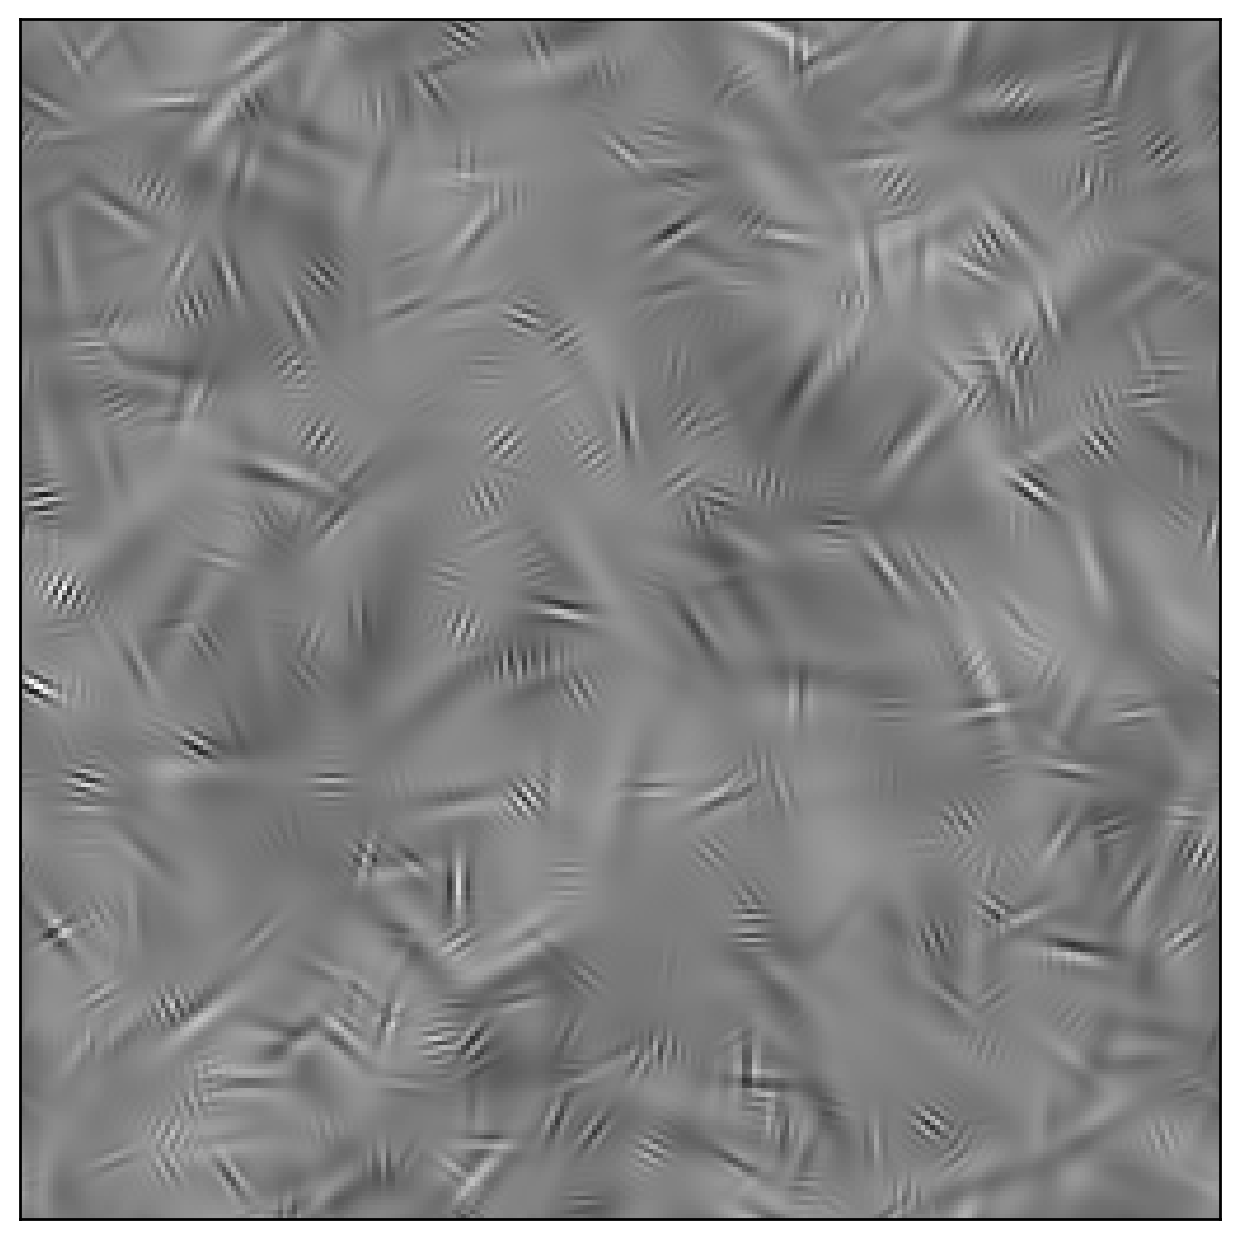

In [4]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')

mp.pe.N = 1024

mp.pe.N_image = 1
print( mp.pe.base_levels, mp.n_levels)
edgeslist = np.zeros((6, mp.pe.N, mp.pe.N_image))
edgeslist[0, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[1, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[2, :, :] = (np.pi* np.random.rand(mp.pe.N, mp.pe.N_image) ) % np.pi
#edgeslist[3, :, :] =  mp.sf_0[np.random.randint(mp.sf_0.size, size=(pe.N, pe.N_image))] # best would be to have more high frequency components
edgeslist[3, :, :] =  np.ceil(mp.pe.base_levels**(mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))/mp.pe.base_levels**(mp.n_levels)
edgeslist[4, :, :] = np.random.randn(mp.pe.N, mp.pe.N_image)
edgeslist[5, :, :] = 2*np.pi*np.random.rand(mp.pe.N, mp.pe.N_image)
print (edgeslist.shape)
image_rec = mp.reconstruct(edgeslist[:,:,0])
image_rec /= image_rec.std()
fig, a = mp.show_edges(np.empty((6,0)), image=image_rec, color='toto', show_phase=False) #

-7.53451402447 9.88166162356


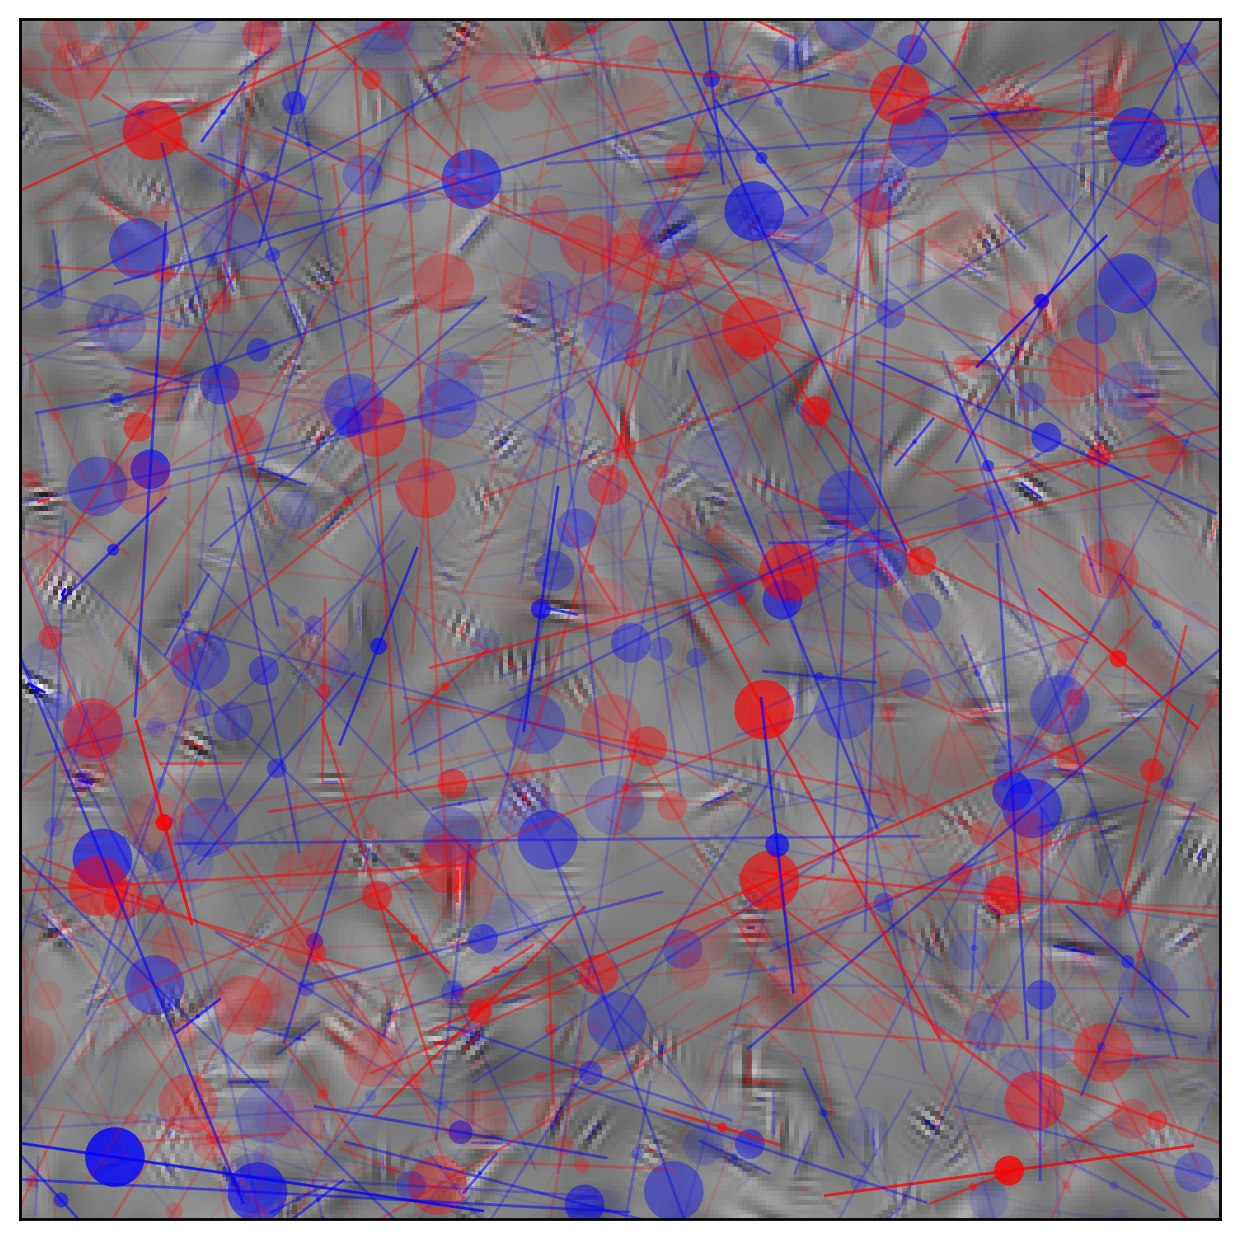

In [5]:
fig, a = mp.show_edges(edgeslist[:,:,0], image=image_rec, color='toto', show_phase=False) #
print (image_rec.min(), image_rec.max())

(array([  23.,   20.,   28.,   25.,   30.,   42.,   54.,   70.,  146.,  586.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ]),
 <a list of 10 Patch objects>)

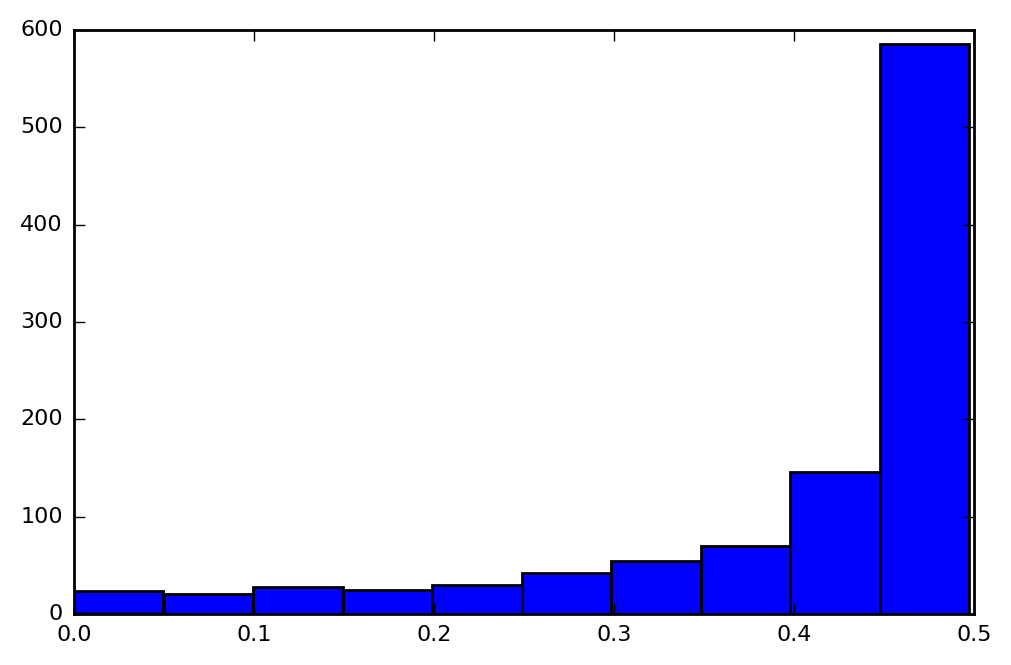

In [6]:
scales = 0.5 * (1- mp.pe.base_levels**(-mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))#/mp.pe.base_levels**(mp.n_levels)
plt.hist(scales)

In [7]:
mp.sf_0[np.random.randint(mp.sf_0.size, size=(4, 5))]

array([[ 0.62,  0.03,  0.24,  0.15,  0.38],
       [ 0.01,  0.15,  0.24,  0.06,  0.02],
       [ 0.09,  0.15,  0.02,  0.62,  0.01],
       [ 0.01,  0.09,  0.01,  0.09,  0.15]])

1.618 11
(6, 1024, 1)
-9.91726278554 9.88704085933


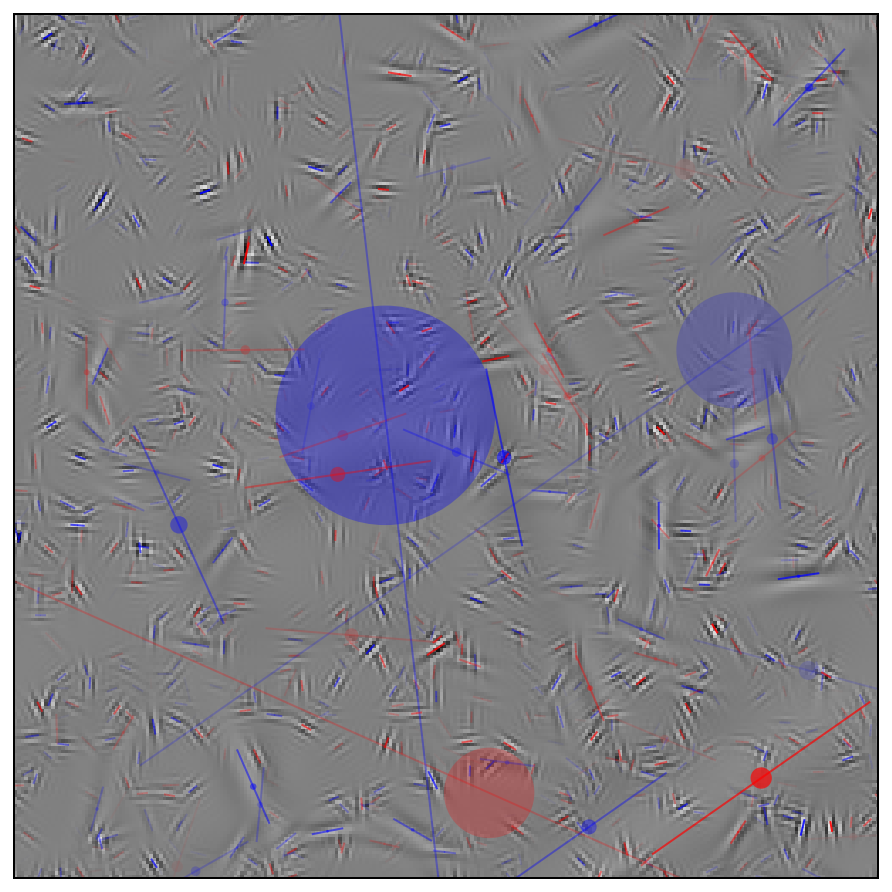

In [8]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

mp.pe.N = 1024

mp.pe.N_image = 1
print (mp.pe.base_levels, mp.n_levels)
edgeslist = np.zeros((6, mp.pe.N, mp.pe.N_image))
edgeslist[0, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[1, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[2, :, :] = (np.pi* np.random.rand(mp.pe.N, mp.pe.N_image) ) % np.pi
#edgeslist[3, :, :] =  mp.sf_0[np.random.randint(mp.sf_0.size, size=(pe.N, pe.N_image))] # best would be to have more high frequency components
edgeslist[3, :, :] =  0.5 * (1- mp.pe.base_levels**(-mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))
edgeslist[4, :, :] = np.random.randn(mp.pe.N, mp.pe.N_image)
edgeslist[5, :, :] = 2*np.pi*np.random.rand(mp.pe.N, mp.pe.N_image)
print (edgeslist.shape)
image_rec = mp.reconstruct(edgeslist[:,:,0])
image_rec /= image_rec.std()
fig, a = mp.show_edges(edgeslist[:,:,0], image=image_rec, color='toto', show_phase=False) #
print (image_rec.min(), image_rec.max())

## some book keeping for the notebook

In [11]:
%install_ext https://raw.githubusercontent.com/rasbt/python_reference/master/ipython_magic/watermark.py
%load_ext watermark
%watermark

02/09/2016 10:16:56

CPython 3.5.2
IPython 5.1.0

compiler   : GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)
system     : Darwin
release    : 15.6.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit


In [12]:
%install_ext http://raw.github.com/jrjohansson/version_information/master/version_information.py
%load_ext version_information
%version_information numpy, scipy, matplotlib, sympy

The version_information extension is already loaded. To reload it, use:
  %reload_ext version_information


Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 7.3.0 (clang-703.0.31)]
IPython 5.1.0
OS Darwin 15.6.0 x86_64 i386 64bit
numpy 1.11.1
scipy 0.18.0
matplotlib 1.5.2
sympy 1.0
Fri Sep 02 10:16:56 2016 CEST

In [9]:
%cd ../notebooks

/Users/lolo/pool/science/BICV/SparseEdges/notebooks
